In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [2]:
# read csv data
df = pd.read_csv("csv/data.csv")

# Drop duplicate rows
df = df.drop_duplicates()

# Delete rows where sex_of_casualty column has values other than 1 or 2
df = df[(df["sex_of_casualty"] == 1) | (df["sex_of_casualty"] == 2)]

# Exclude rows from the DataFrame where the 'vehicle_reference' column is either 227 or 61.
df = df[(df["vehicle_reference"] != 227) & (df["vehicle_reference"] != 61)]

# The 'car_passenger' column should only contain the values [-1, 0, 1, 2].
df = df[df["car_passenger"].isin([-1, 0, 1, 2, 9])]

# General information about dataset

### How many accidents exist in this dataset?

In [3]:
# Get the shape of the dataset
dataset_shape = df.shape
print("Shape of the dataset (rows, columns):", dataset_shape)

# Count the number of unique values in the 'accident_index' column
unique_accident_index_count = df["accident_index"].nunique()
print(
    "Number of unique values in the 'accident_index' column:",
    unique_accident_index_count,
)

Shape of the dataset (rows, columns): (60892, 20)
Number of unique values in the 'accident_index' column: 48078


### Which class of casualty experiences the highest number of accidents?

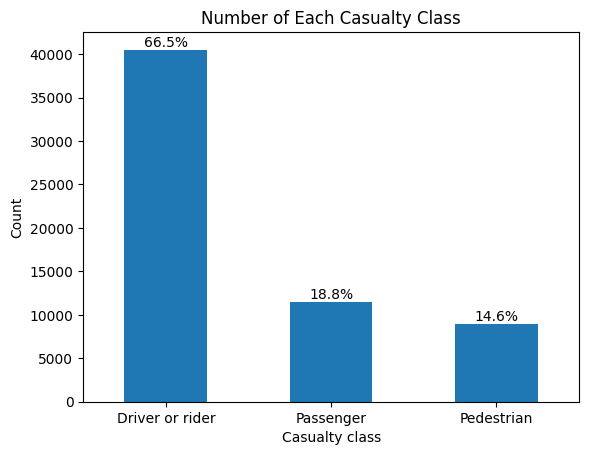

In [4]:
# Plot the number of occurrences of each class in the 'casualty_class' column
class_counts = df["casualty_class"].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = ["Driver or rider", "Passenger", "Pedestrian"]

# Plot the bar chart
ax = class_counts.plot(kind="bar")
plt.xlabel("Casualty class")
plt.ylabel("Count")
plt.title("Number of Each Casualty Class")

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names, rotation=0)

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f"{percentages[i+1]:.1f}%", ha="center", va="bottom")

plt.show()

### Percentage of casualties by different types.

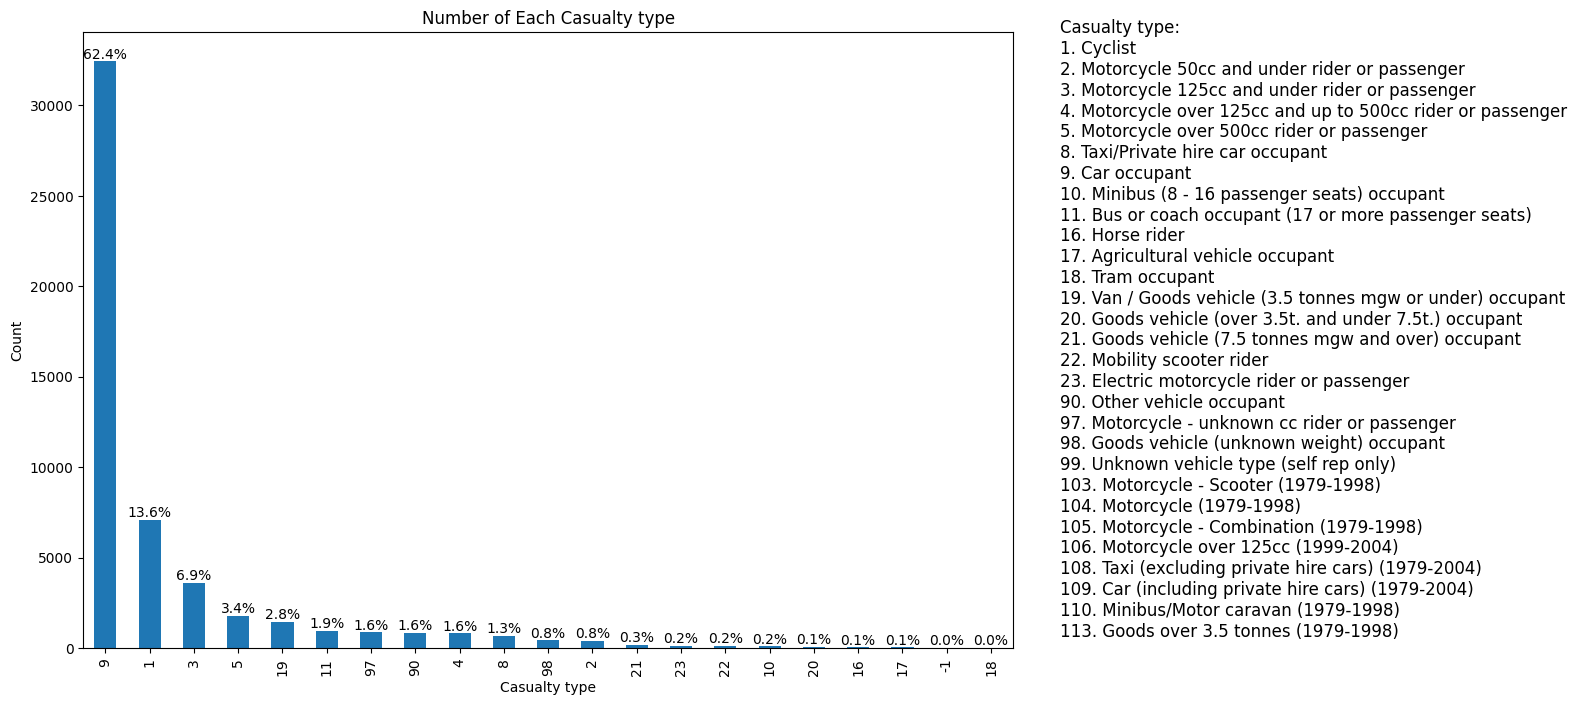

In [5]:
# Plot the number of occurrences of each type of the 'casualty_type' column
class_counts = df[df["casualty_type"] != -1]["casualty_type"].value_counts()
class_counts = df[df["casualty_type"] != 0]["casualty_type"].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
# bar_names = ['Driver or rider', 'Passenger', 'Pedestrian']

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = class_counts.plot(kind="bar")
plt.xlabel("Casualty type")
plt.ylabel("Count")
plt.title("Number of Each Casualty type")

# Set the names of the bars
text = (
    "Casualty type:\n"
    + "1. Cyclist\n"
    + "2. Motorcycle 50cc and under rider or passenger\n"
    + "3. Motorcycle 125cc and under rider or passenger\n"
    + "4. Motorcycle over 125cc and up to 500cc rider or passenger\n"
    + "5. Motorcycle over 500cc rider or passenger\n"
    + "8. Taxi/Private hire car occupant\n"
    + "9. Car occupant\n"
    + "10. Minibus (8 - 16 passenger seats) occupant\n"
    + "11. Bus or coach occupant (17 or more passenger seats)\n"
    + "16. Horse rider\n"
    + "17. Agricultural vehicle occupant\n"
    + "18. Tram occupant\n"
    + "19. Van / Goods vehicle (3.5 tonnes mgw or under) occupant\n"
    + "20. Goods vehicle (over 3.5t. and under 7.5t.) occupant\n"
    + "21. Goods vehicle (7.5 tonnes mgw and over) occupant\n"
    + "22. Mobility scooter rider\n"
    + "23. Electric motorcycle rider or passenger\n"
    + "90. Other vehicle occupant\n"
    + "97. Motorcycle - unknown cc rider or passenger\n"
    + "98. Goods vehicle (unknown weight) occupant\n"
    + "99. Unknown vehicle type (self rep only)\n"
    + "103. Motorcycle - Scooter (1979-1998)\n"
    + "104. Motorcycle (1979-1998)\n"
    + "105. Motorcycle - Combination (1979-1998)\n"
    + "106. Motorcycle over 125cc (1999-2004)\n"
    + "108. Taxi (excluding private hire cars) (1979-2004)\n"
    + "109. Car (including private hire cars) (1979-2004)\n"
    + "110. Minibus/Motor caravan (1979-1998)\n"
    + "113. Goods over 3.5 tonnes (1979-1998)\n"
)

plt.text(1.05, 0.5, text, fontsize=12, transform=plt.gca().transAxes, va="center")


# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(
        i, v + 1, f"{percentages[percentages.index[i]]:.1f}%", ha="center", va="bottom"
    )

plt.show()

### Which gender experiences the highest number of accidents?

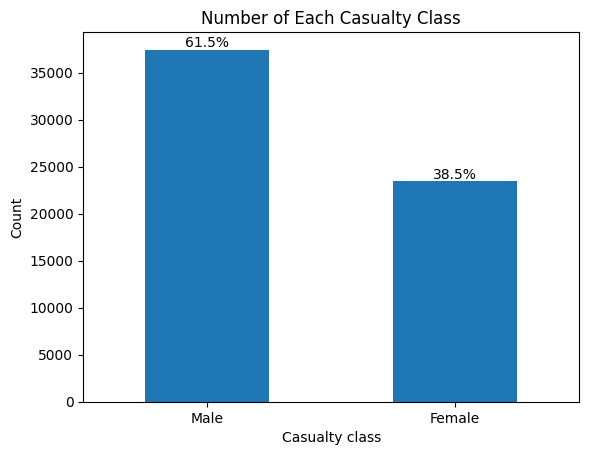

In [6]:
# Plot the number of occurrences of each class in the 'sex_of_casualty' column
class_counts = df["sex_of_casualty"].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = ["Male", "Female"]

# Plot the bar chart
ax = class_counts.plot(kind="bar")
plt.xlabel("Casualty class")
plt.ylabel("Count")
plt.title("Number of Each Casualty Class")

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names, rotation=0)

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f"{percentages[i+1]:.1f}%", ha="center", va="bottom")

plt.show()

### The distribution of the age of casualties.

Number of occurrences of -1 in 'age_of_casualty' column: 1068
Number of occurrences of different values in 'age_of_casualty' column:  102
Maximum count of occurrences of a unique age: 1595
Age(s) with the maximum count: 18


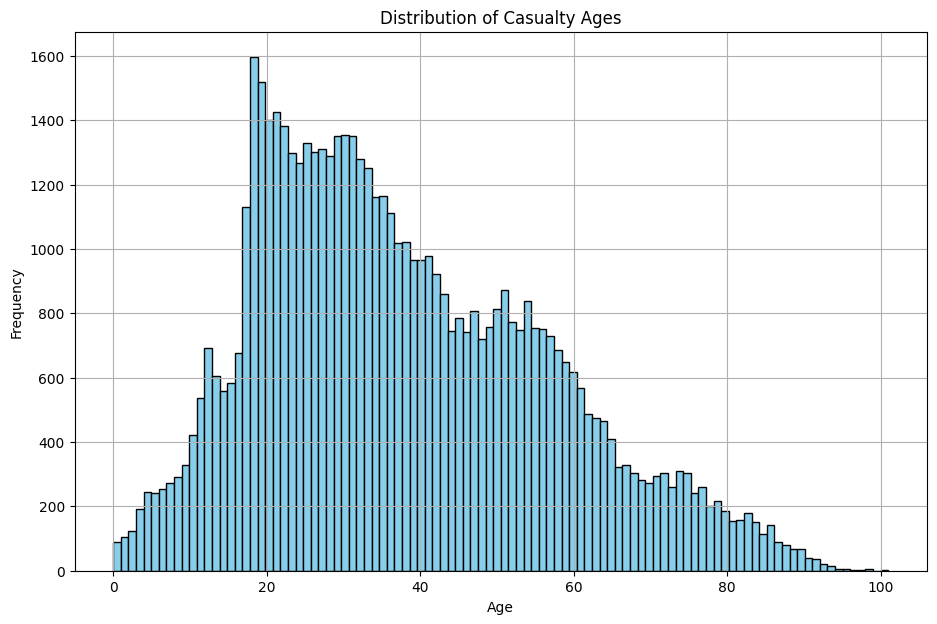

In [7]:
num_minus_one = (df["age_of_casualty"] == -1).sum()
print("Number of occurrences of -1 in 'age_of_casualty' column:", num_minus_one)

age_counts = df["age_of_casualty"].value_counts()
print(
    "Number of occurrences of different values in 'age_of_casualty' column: ",
    len(age_counts),
)

max_count = age_counts.max()
ages_with_max_count = age_counts[age_counts == max_count].index.tolist()
print("Maximum count of occurrences of a unique age:", max_count)
print("Age(s) with the maximum count:", ages_with_max_count[0])

# Filter out the -1 values from the 'age_of_casualty' column
filtered_age = df[df["age_of_casualty"] != -1]["age_of_casualty"]

# Plot the histogram of ages
plt.figure(figsize=(11, 7))
plt.hist(filtered_age, bins=102, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Casualty Ages")
plt.grid(True)
plt.show()

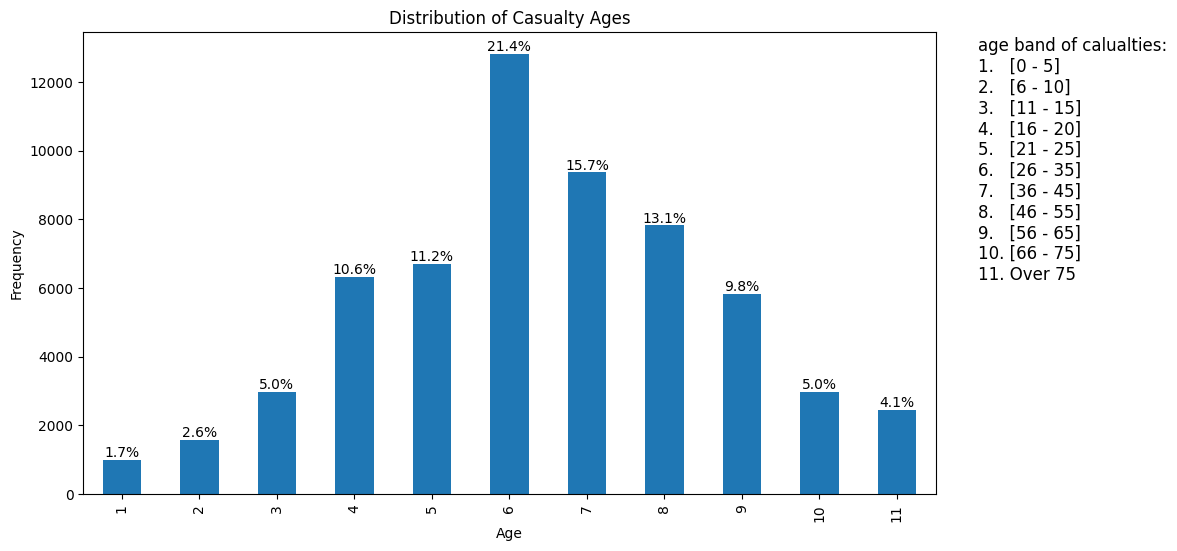

In [8]:
# Filter out the -1 values from the 'age_band_of_casualty' column
class_counts = (
    df[df["age_band_of_casualty"] != -1]["age_band_of_casualty"]
    .value_counts()
    .sort_index()
)

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(11, 6))
ax = class_counts.plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Casualty Ages")

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(
        i, v + 1, f"{percentages[percentages.index[i]]:.1f}%", ha="center", va="bottom"
    )

text = (
    "age band of calualties:\n"
    + "1.   [0 - 5]\n2.   [6 - 10]\n3.   [11 - 15]\n4.   [16 - 20]\n5.   [21 - 25]\n6.   [26 - 35]\n7.   [36 - 45]\n8.   [46 - 55]\n"
    "9.   [56 - 65]\n10. [66 - 75]\n11. Over 75\n"
)
plt.text(1.05, 0.7, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

### Analyze car passenger

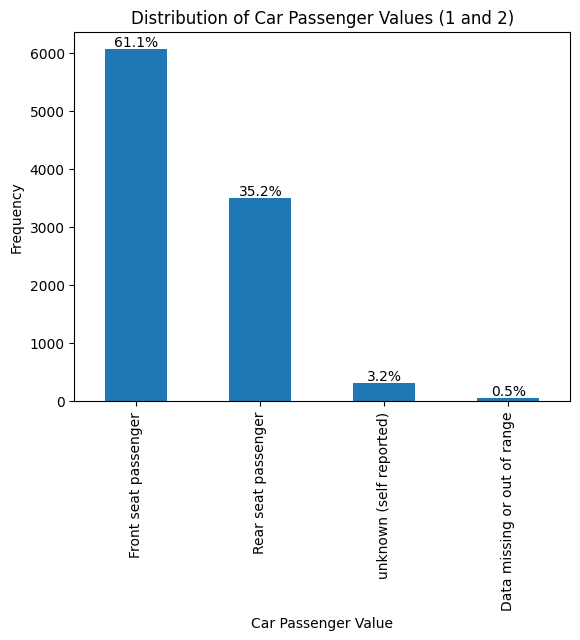

In [9]:
# Plot the number of occurrences of each class in the 'sex_of_casualty' column
class_counts = df[df["car_passenger"].isin([-1, 1, 2, 9])]
class_counts = class_counts["car_passenger"].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = [
    "Front seat passenger",
    "Rear seat passenger",
    "unknown (self reported)",
    "Data missing or out of range",
]
# Plot the bar chart
ax = class_counts.plot(kind="bar")
plt.xlabel("Car Passenger Value")
plt.ylabel("Frequency")
plt.title("Distribution of Car Passenger Values (1 and 2)")

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names)
# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(
        i, v + 1, f"{percentages[percentages.index[i]]:.1f}%", ha="center", va="bottom"
    )

plt.show()

### The following result displays the relationship between casualty severity and casualty's home area type

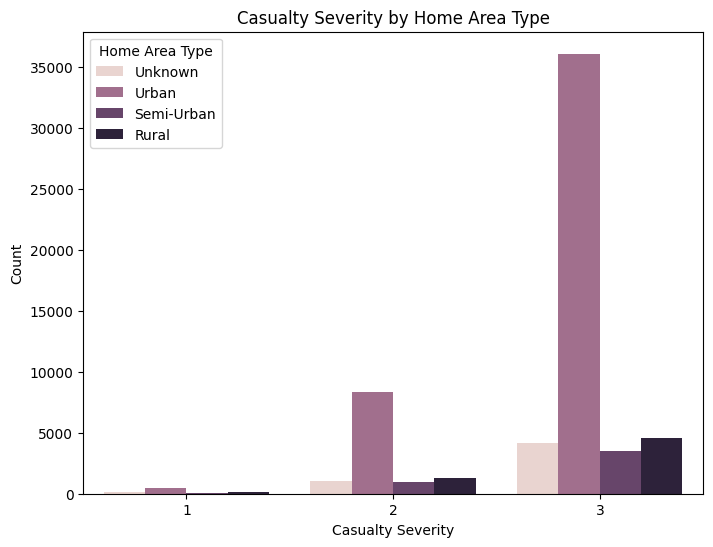

In [10]:
# Plot the relationship between casualty severity and casualty's home area type
plt.figure(figsize=(8, 6))
sns.countplot(x="casualty_severity", hue="casualty_home_area_type", data=df)
plt.title("Casualty Severity by Home Area Type")
plt.xlabel("Casualty Severity")
plt.ylabel("Count")
plt.legend(title="Home Area Type", labels=["Unknown", "Urban", "Semi-Urban", "Rural"])
plt.show()

###  The IMD decile of the area where the casualty resides (a measure of deprivation).

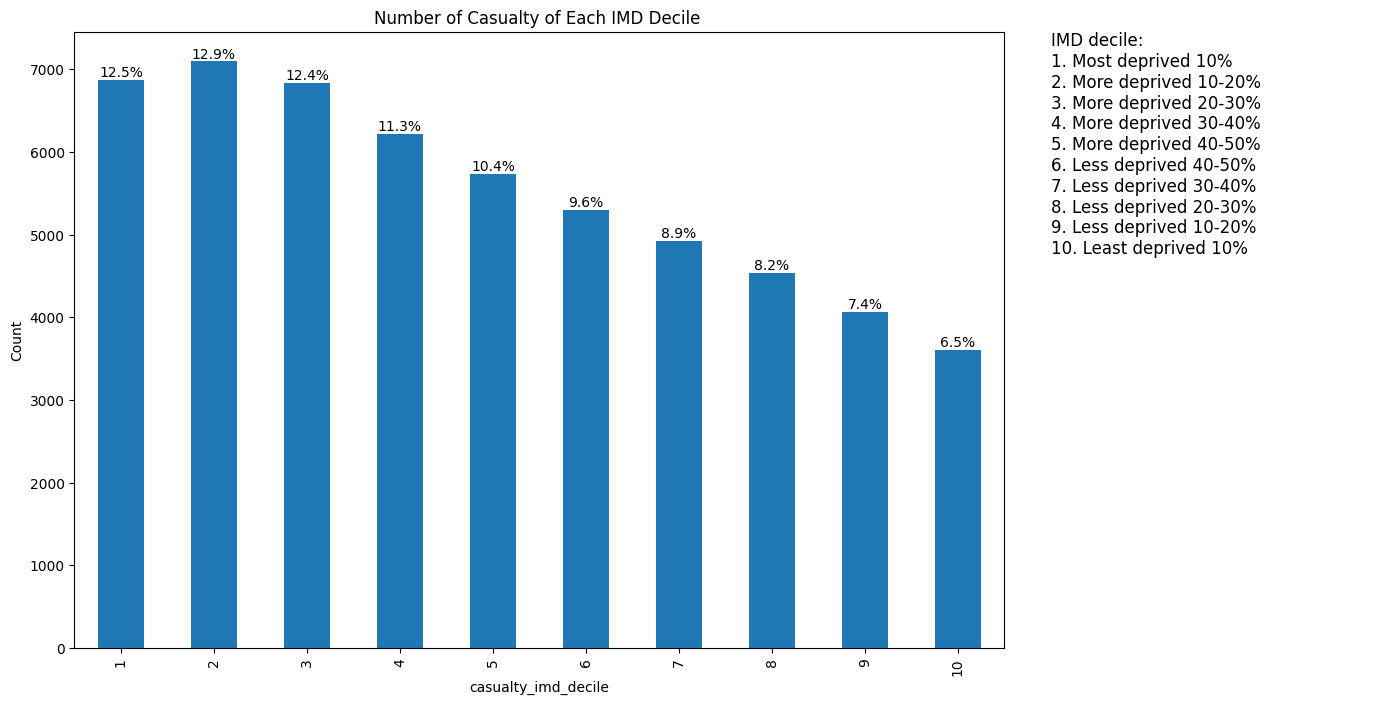

In [11]:
# Plot the number of occurrences of each class in the 'casualty_imd_decile' column
class_counts = (
    df[df["casualty_imd_decile"] != -1]["casualty_imd_decile"]
    .value_counts()
    .sort_index()
)

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = class_counts.plot(kind="bar")
plt.xlabel("casualty_imd_decile")
plt.ylabel("Count")
plt.title("Number of Casualty of Each IMD Decile ")

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(
        i, v + 1, f"{percentages[percentages.index[i]]:.1f}%", ha="center", va="bottom"
    )

text = (
    "IMD decile:\n"
    + "1. Most deprived 10%                         \n"
    + "2. More deprived 10-20%                     \n"
    + "3. More deprived 20-30%                     \n"
    + "4. More deprived 30-40%                     \n"
    + "5. More deprived 40-50%                     \n"
    + "6. Less deprived 40-50%                     \n"
    + "7. Less deprived 30-40%                     \n"
    + "8. Less deprived 20-30%                     \n"
    + "9. Less deprived 10-20%                     \n"
    + "10. Least deprived 10%                      \n"
)
plt.text(1.05, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


### Correlation of all parameters.

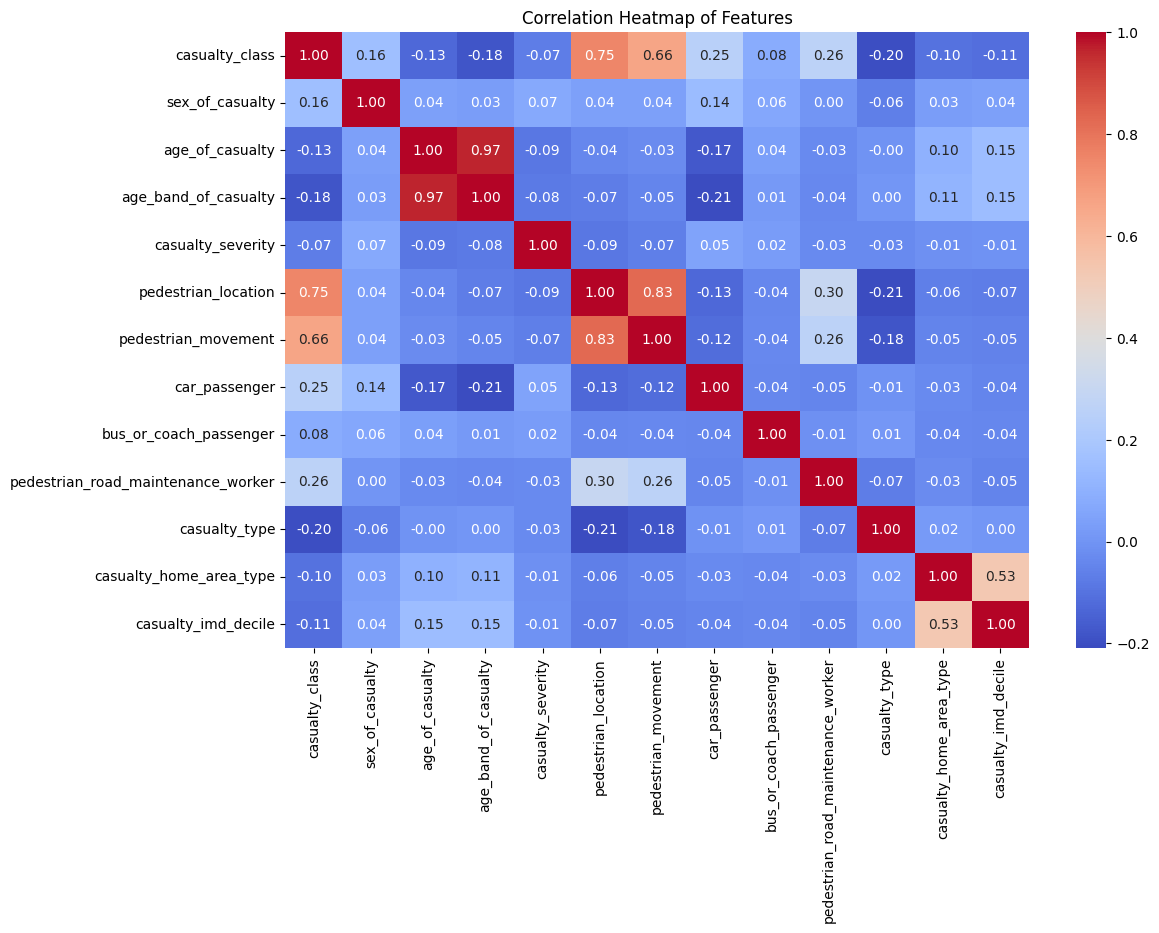

In [12]:
# Select only the columns that should be included in the correlation analysis
columns_of_interest = [
    "casualty_class",
    "sex_of_casualty",
    "age_of_casualty",
    "age_band_of_casualty",
    "casualty_severity",
    "pedestrian_location",
    "pedestrian_movement",
    "car_passenger",
    "bus_or_coach_passenger",
    "pedestrian_road_maintenance_worker",
    "casualty_type",
    "casualty_home_area_type",
    "casualty_imd_decile",
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### General information about the number of each type of casualty severity according to the age of the casualty.

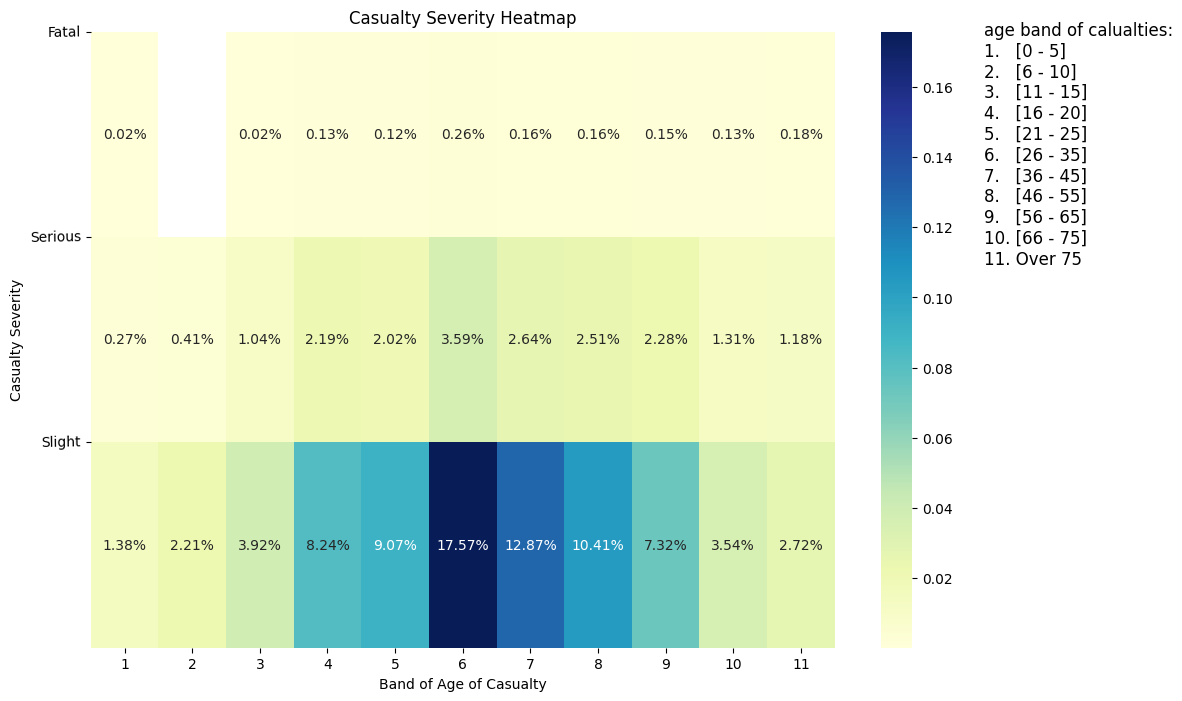

In [13]:
# Filter out rows where 'age_band_of_casualty' is not -1
df_temp = df[df["age_band_of_casualty"] != -1]

# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["age_band_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)
total_cnt = grouped["count"].sum()

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="age_band_of_casualty", values="count"
)
heatmap_data = heatmap_data / total_cnt

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2%")
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Band of Age of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

text = (
    "age band of calualties:\n"
    + "1.   [0 - 5]\n2.   [6 - 10]\n3.   [11 - 15]\n4.   [16 - 20]\n5.   [21 - 25]\n6.   [26 - 35]\n7.   [36 - 45]\n8.   [46 - 55]\n"
    "9.   [56 - 65]\n10. [66 - 75]\n11. Over 75\n"
)
plt.text(1.2, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

### Find the most common age bands of casualties for each type of casualty severity.

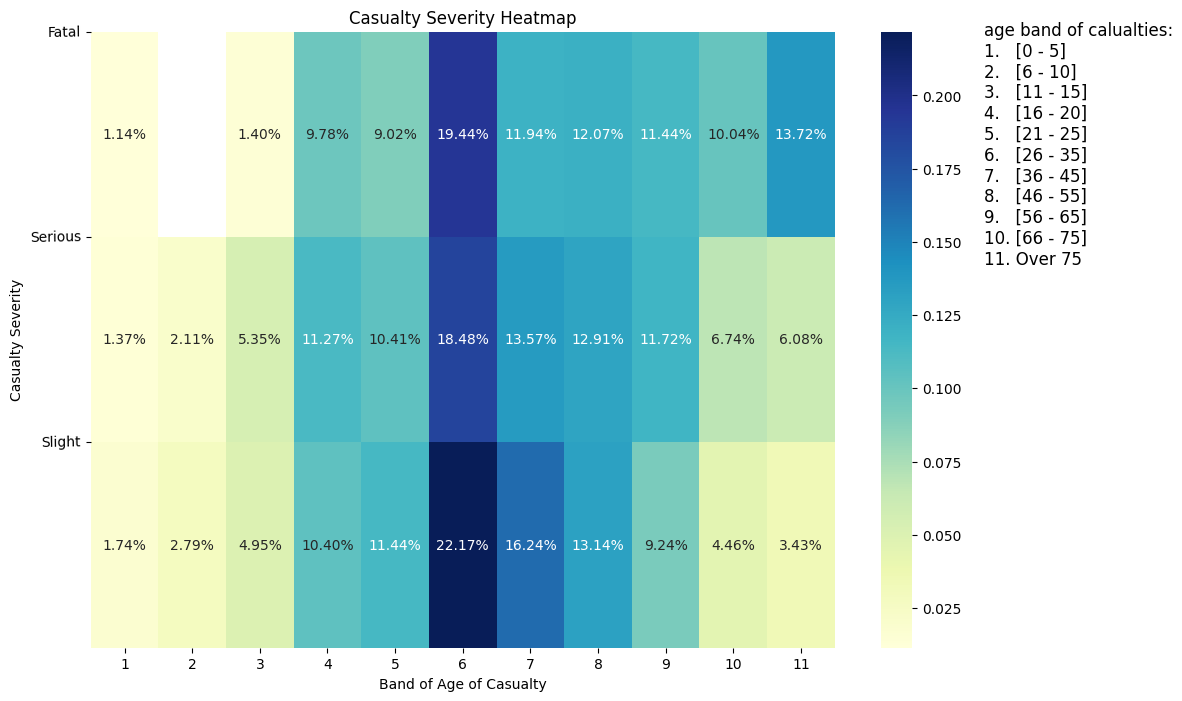

In [14]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["age_band_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="age_band_of_casualty", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%")

plt.title("Casualty Severity Heatmap")
plt.xlabel("Band of Age of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

text = (
    "age band of calualties:\n"
    + "1.   [0 - 5]\n2.   [6 - 10]\n3.   [11 - 15]\n4.   [16 - 20]\n5.   [21 - 25]\n6.   [26 - 35]\n7.   [36 - 45]\n8.   [46 - 55]\n"
    "9.   [56 - 65]\n10. [66 - 75]\n11. Over 75\n"
)
plt.text(1.2, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

### Find the most common types of casualty severity within each age band of casualties.

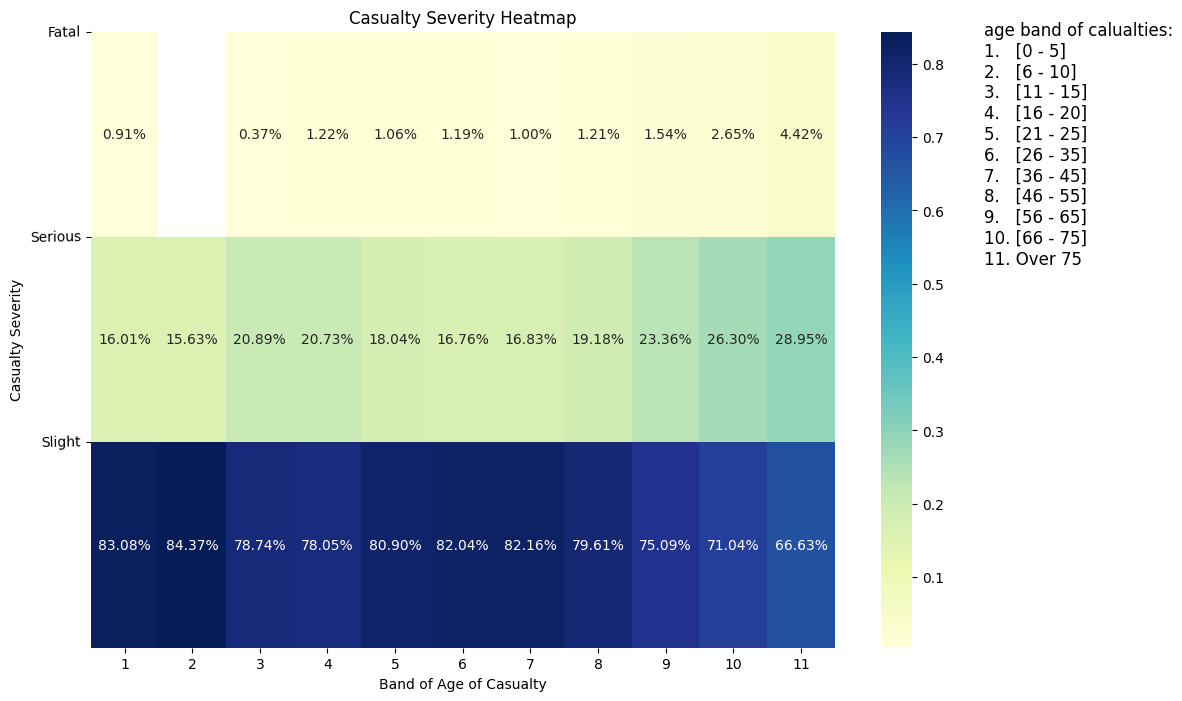

In [15]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["age_band_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="age_band_of_casualty", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%")

plt.title("Casualty Severity Heatmap")
plt.xlabel("Band of Age of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

text = (
    "age band of calualties:\n"
    + "1.   [0 - 5]\n2.   [6 - 10]\n3.   [11 - 15]\n4.   [16 - 20]\n5.   [21 - 25]\n6.   [26 - 35]\n7.   [36 - 45]\n8.   [46 - 55]\n"
    "9.   [56 - 65]\n10. [66 - 75]\n11. Over 75\n"
)
plt.text(1.2, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


### casualty_severity according to sex_of_casualty
This analysis displays the number of casualties for each sex and provides a general overview of the relationship between casualty severity and the sex of the casualties.

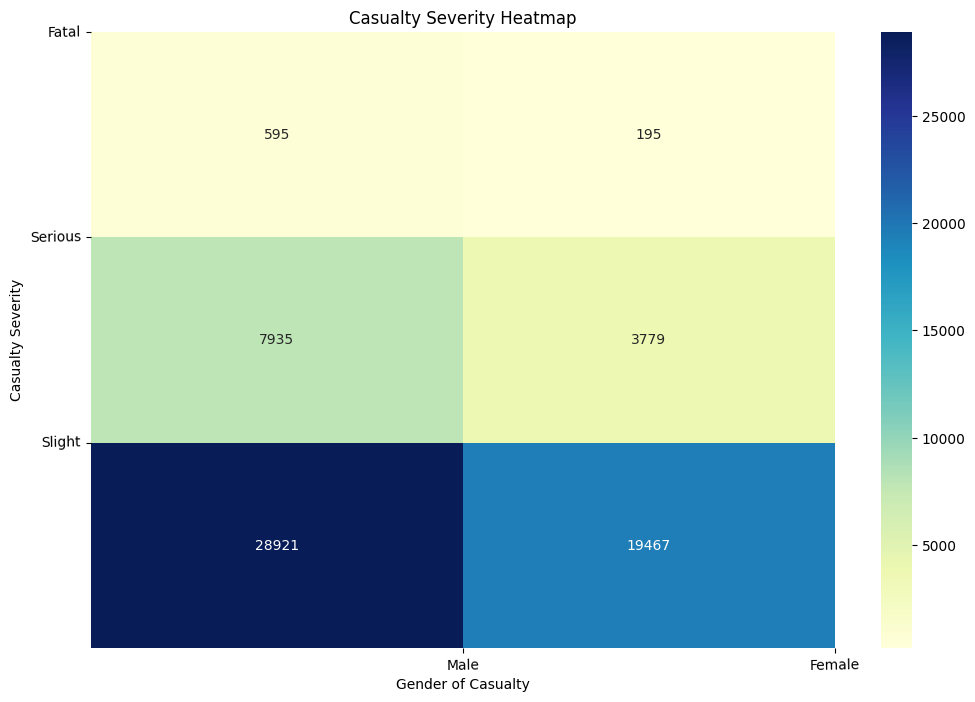

In [16]:
df_temp = df[df["sex_of_casualty"] != -1]

grouped = (
    df_temp.groupby(["sex_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)
# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="sex_of_casualty", values="count"
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="g")

plt.title("Casualty Severity Heatmap")
plt.xlabel("Gender of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)
plt.xticks(ticks=[1, 2], labels=["Male", "Female"], rotation=1)

plt.show()


### The following results display how many casualties of one type are related to each gender.

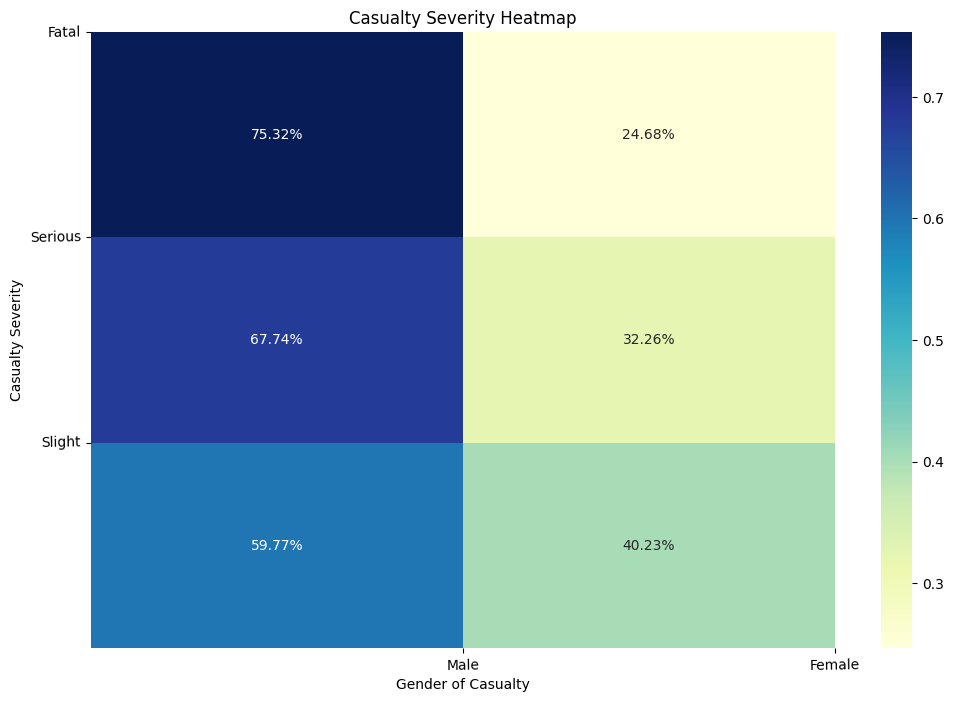

In [17]:
grouped = (
    df_temp.groupby(["sex_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="sex_of_casualty", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%")

plt.title("Casualty Severity Heatmap")
plt.xlabel("Gender of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)
plt.xticks(ticks=[1, 2], labels=["Male", "Female"], rotation=1)

plt.show()

### The following results display how many genders of one type are related to each casualty class.

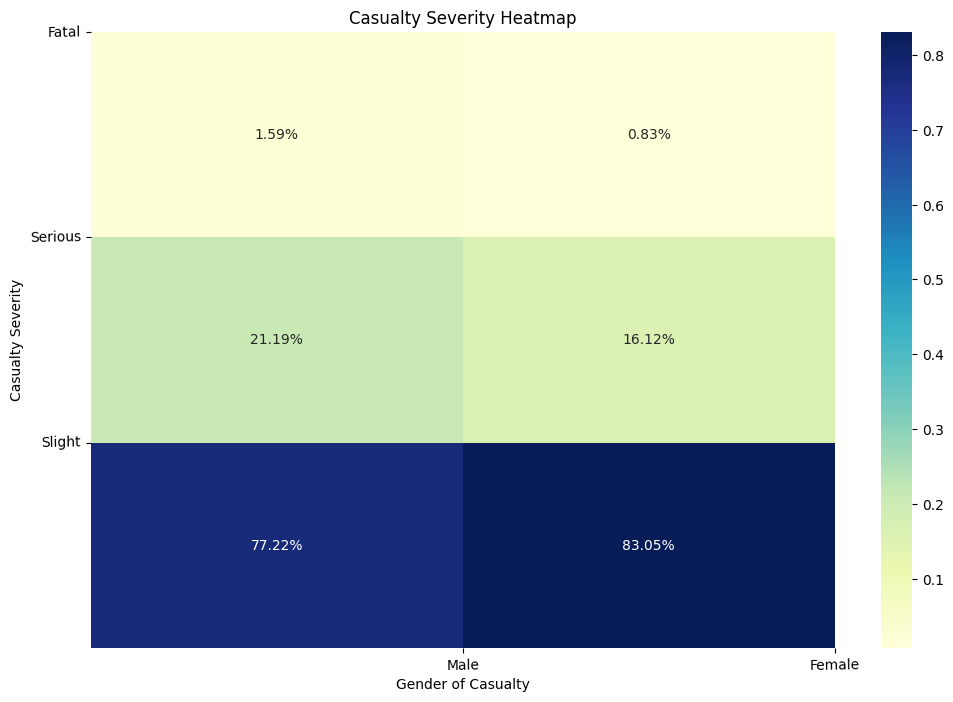

In [18]:
grouped = (
    df_temp.groupby(["sex_of_casualty", "casualty_severity"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="sex_of_casualty", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%")

plt.title("Casualty Severity Heatmap")
plt.xlabel("Gender of Casualty")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)
plt.xticks(ticks=[1, 2], labels=["Male", "Female"], rotation=1)

plt.show()


### The number of casualties according to casualty type and casualty severity.

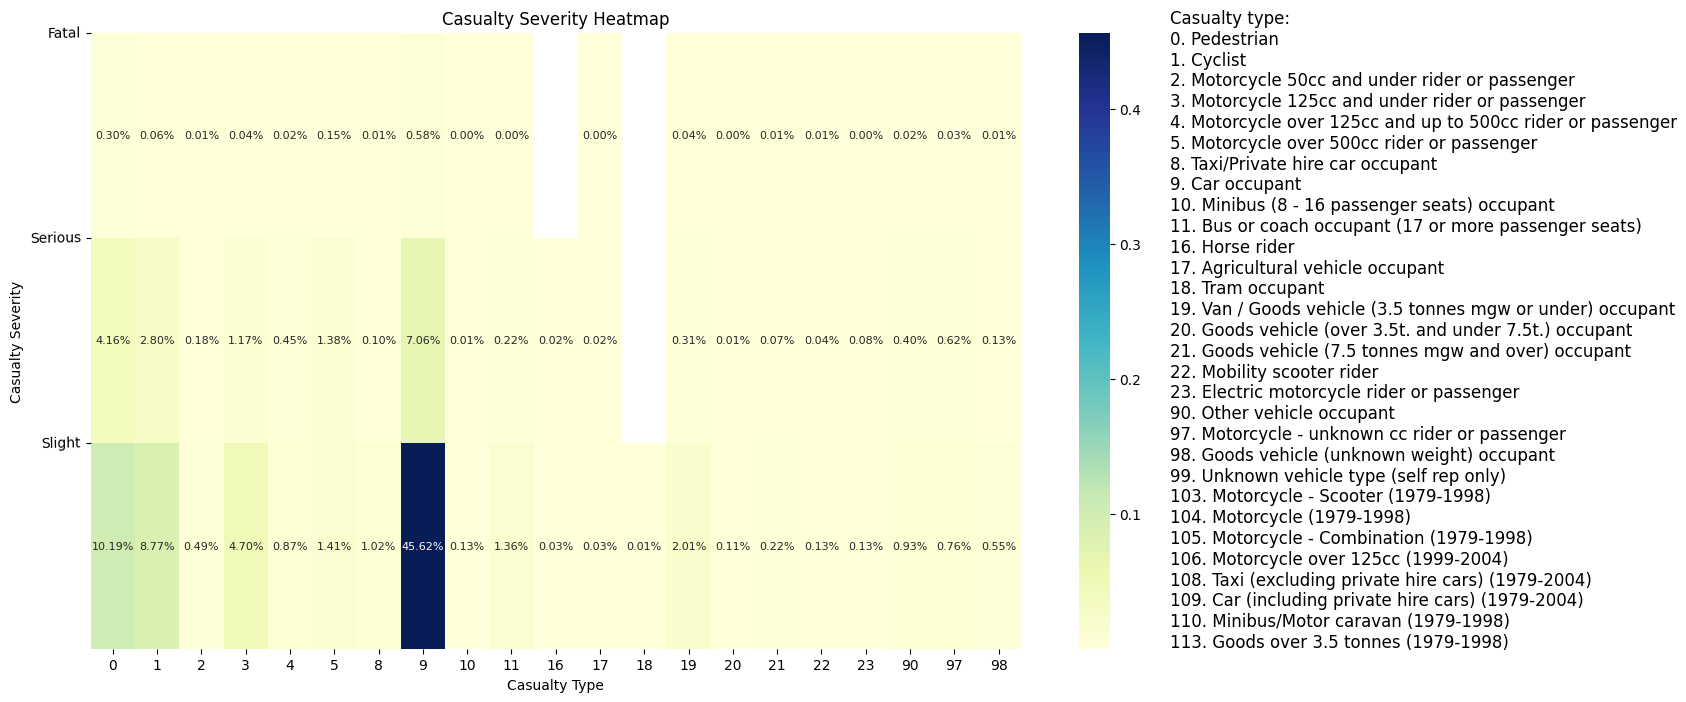

In [19]:
# Filter out rows where 'age_band_of_casualty' is not -1
df_temp = df[df["casualty_type"] != -1]

# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "casualty_type"])
    .size()
    .reset_index(name="count")
)
total_cnt = grouped["count"].sum()

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="casualty_type", values="count"
)
heatmap_data = heatmap_data / total_cnt

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2%",  annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Casualty Type")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Casualty type:\n"
    + "0. Pedestrian\n"
    + "1. Cyclist\n"
    + "2. Motorcycle 50cc and under rider or passenger\n"
    + "3. Motorcycle 125cc and under rider or passenger\n"
    + "4. Motorcycle over 125cc and up to 500cc rider or passenger\n"
    + "5. Motorcycle over 500cc rider or passenger\n"
    + "8. Taxi/Private hire car occupant\n"
    + "9. Car occupant\n"
    + "10. Minibus (8 - 16 passenger seats) occupant\n"
    + "11. Bus or coach occupant (17 or more passenger seats)\n"
    + "16. Horse rider\n"
    + "17. Agricultural vehicle occupant\n"
    + "18. Tram occupant\n"
    + "19. Van / Goods vehicle (3.5 tonnes mgw or under) occupant\n"
    + "20. Goods vehicle (over 3.5t. and under 7.5t.) occupant\n"
    + "21. Goods vehicle (7.5 tonnes mgw and over) occupant\n"
    + "22. Mobility scooter rider\n"
    + "23. Electric motorcycle rider or passenger\n"
    + "90. Other vehicle occupant\n"
    + "97. Motorcycle - unknown cc rider or passenger\n"
    + "98. Goods vehicle (unknown weight) occupant\n"
    + "99. Unknown vehicle type (self rep only)\n"
    + "103. Motorcycle - Scooter (1979-1998)\n"
    + "104. Motorcycle (1979-1998)\n"
    + "105. Motorcycle - Combination (1979-1998)\n"
    + "106. Motorcycle over 125cc (1999-2004)\n"
    + "108. Taxi (excluding private hire cars) (1979-2004)\n"
    + "109. Car (including private hire cars) (1979-2004)\n"
    + "110. Minibus/Motor caravan (1979-1998)\n"
    + "113. Goods over 3.5 tonnes (1979-1998)\n"
)

plt.text(1.16, 0.5, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

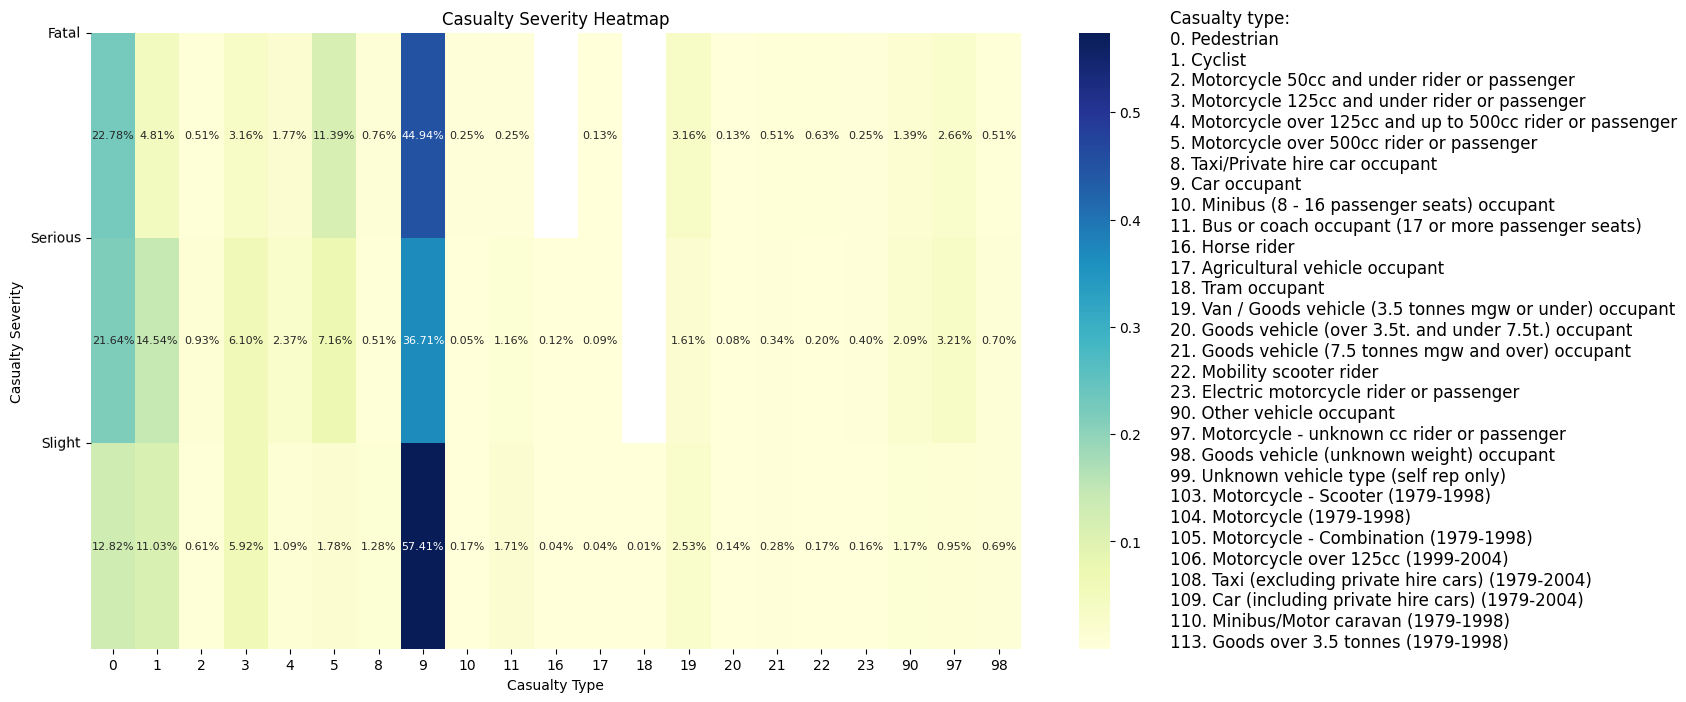

In [20]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "casualty_type"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="casualty_type", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%",  annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Casualty Type")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Casualty type:\n"
    + "0. Pedestrian\n"
    + "1. Cyclist\n"
    + "2. Motorcycle 50cc and under rider or passenger\n"
    + "3. Motorcycle 125cc and under rider or passenger\n"
    + "4. Motorcycle over 125cc and up to 500cc rider or passenger\n"
    + "5. Motorcycle over 500cc rider or passenger\n"
    + "8. Taxi/Private hire car occupant\n"
    + "9. Car occupant\n"
    + "10. Minibus (8 - 16 passenger seats) occupant\n"
    + "11. Bus or coach occupant (17 or more passenger seats)\n"
    + "16. Horse rider\n"
    + "17. Agricultural vehicle occupant\n"
    + "18. Tram occupant\n"
    + "19. Van / Goods vehicle (3.5 tonnes mgw or under) occupant\n"
    + "20. Goods vehicle (over 3.5t. and under 7.5t.) occupant\n"
    + "21. Goods vehicle (7.5 tonnes mgw and over) occupant\n"
    + "22. Mobility scooter rider\n"
    + "23. Electric motorcycle rider or passenger\n"
    + "90. Other vehicle occupant\n"
    + "97. Motorcycle - unknown cc rider or passenger\n"
    + "98. Goods vehicle (unknown weight) occupant\n"
    + "99. Unknown vehicle type (self rep only)\n"
    + "103. Motorcycle - Scooter (1979-1998)\n"
    + "104. Motorcycle (1979-1998)\n"
    + "105. Motorcycle - Combination (1979-1998)\n"
    + "106. Motorcycle over 125cc (1999-2004)\n"
    + "108. Taxi (excluding private hire cars) (1979-2004)\n"
    + "109. Car (including private hire cars) (1979-2004)\n"
    + "110. Minibus/Motor caravan (1979-1998)\n"
    + "113. Goods over 3.5 tonnes (1979-1998)\n"
)

plt.text(1.16, 0.5, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

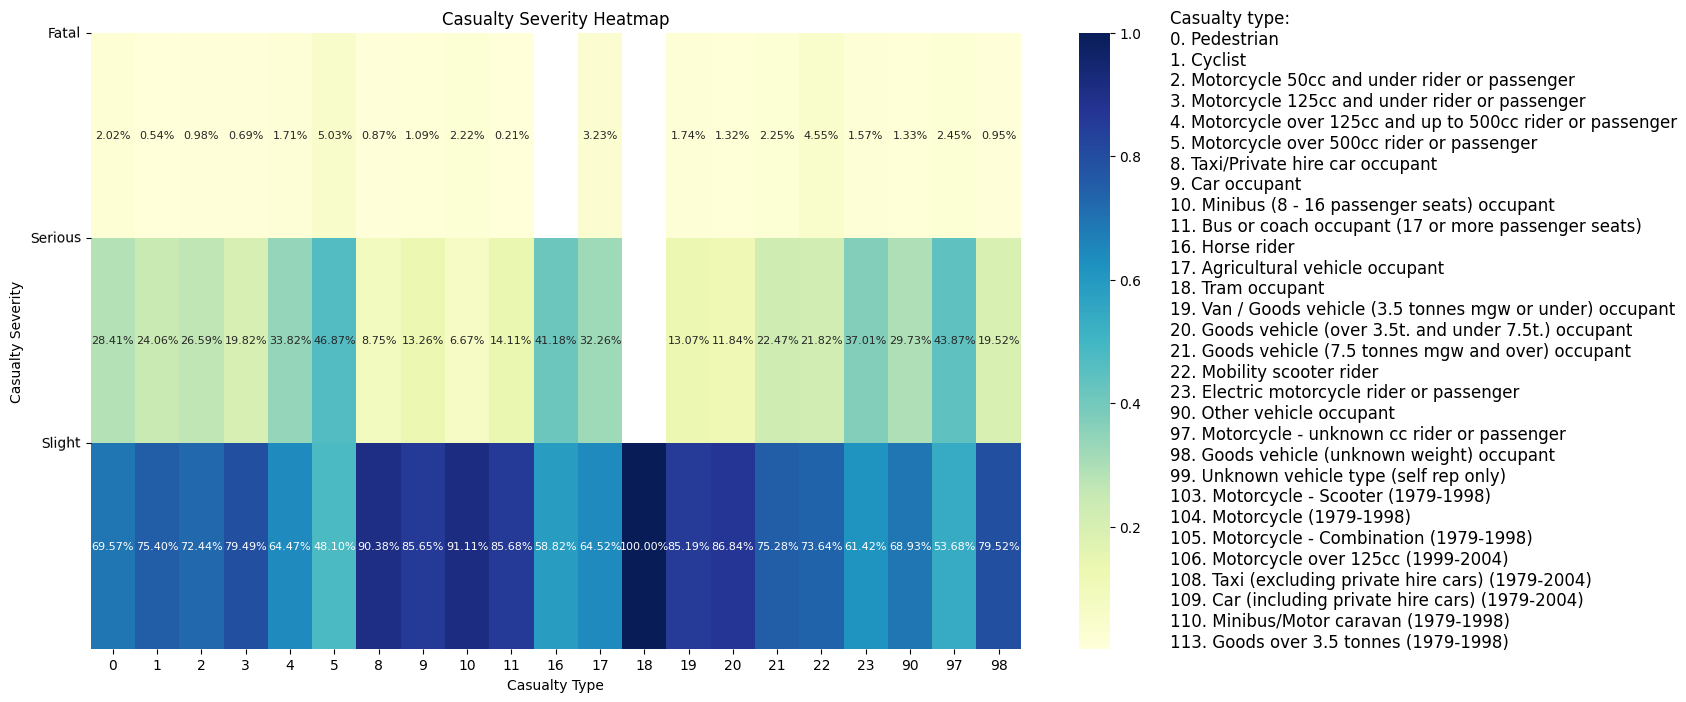

In [21]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "casualty_type"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="casualty_type", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%",  annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Casualty Type")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Casualty type:\n"
    + "0. Pedestrian\n"
    + "1. Cyclist\n"
    + "2. Motorcycle 50cc and under rider or passenger\n"
    + "3. Motorcycle 125cc and under rider or passenger\n"
    + "4. Motorcycle over 125cc and up to 500cc rider or passenger\n"
    + "5. Motorcycle over 500cc rider or passenger\n"
    + "8. Taxi/Private hire car occupant\n"
    + "9. Car occupant\n"
    + "10. Minibus (8 - 16 passenger seats) occupant\n"
    + "11. Bus or coach occupant (17 or more passenger seats)\n"
    + "16. Horse rider\n"
    + "17. Agricultural vehicle occupant\n"
    + "18. Tram occupant\n"
    + "19. Van / Goods vehicle (3.5 tonnes mgw or under) occupant\n"
    + "20. Goods vehicle (over 3.5t. and under 7.5t.) occupant\n"
    + "21. Goods vehicle (7.5 tonnes mgw and over) occupant\n"
    + "22. Mobility scooter rider\n"
    + "23. Electric motorcycle rider or passenger\n"
    + "90. Other vehicle occupant\n"
    + "97. Motorcycle - unknown cc rider or passenger\n"
    + "98. Goods vehicle (unknown weight) occupant\n"
    + "99. Unknown vehicle type (self rep only)\n"
    + "103. Motorcycle - Scooter (1979-1998)\n"
    + "104. Motorcycle (1979-1998)\n"
    + "105. Motorcycle - Combination (1979-1998)\n"
    + "106. Motorcycle over 125cc (1999-2004)\n"
    + "108. Taxi (excluding private hire cars) (1979-2004)\n"
    + "109. Car (including private hire cars) (1979-2004)\n"
    + "110. Minibus/Motor caravan (1979-1998)\n"
    + "113. Goods over 3.5 tonnes (1979-1998)\n"
)

plt.text(1.16, 0.5, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()

### The number of casualties according to pedestrian location and casualty severity.

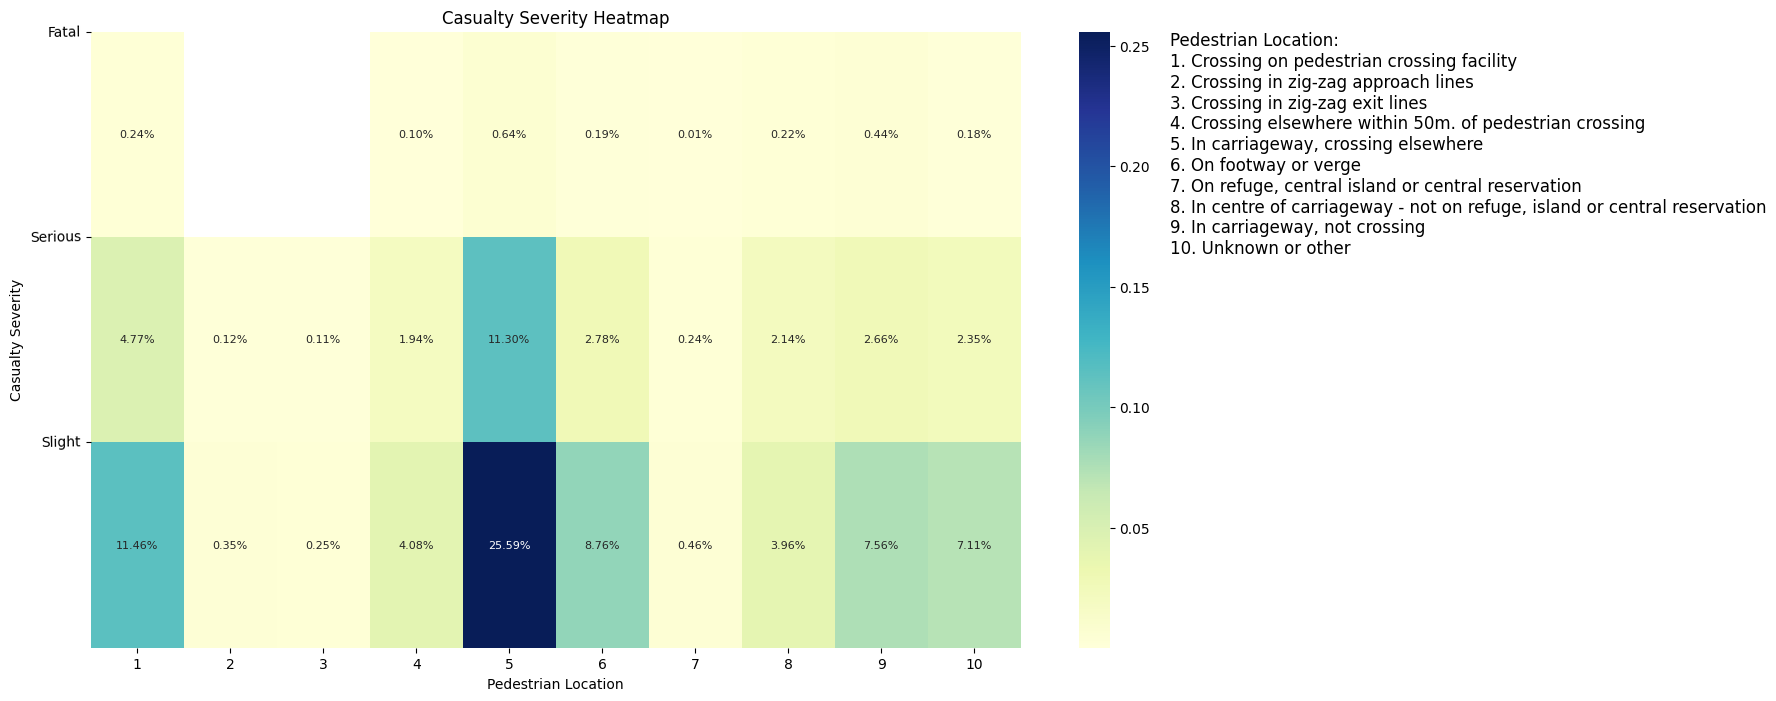

In [22]:
# Filter out rows where 'age_band_of_casualty' is not -1
df_temp = df[df["pedestrian_location"] != -1]
df_temp = df_temp[df_temp["pedestrian_location"] != 0]

# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_location"])
    .size()
    .reset_index(name="count")
)
total_cnt = grouped["count"].sum()

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_location", values="count"
)
heatmap_data = heatmap_data / total_cnt

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Location")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Location:\n"
    + "1. Crossing on pedestrian crossing facility\n"
    + "2. Crossing in zig-zag approach lines\n"
    + "3. Crossing in zig-zag exit lines\n"
    + "4. Crossing elsewhere within 50m. of pedestrian crossing\n"
    + "5. In carriageway, crossing elsewhere\n"
    + "6. On footway or verge\n"
    + "7. On refuge, central island or central reservation\n"
    + "8. In centre of carriageway - not on refuge, island or central reservation\n"
    + "9. In carriageway, not crossing\n"
    + "10. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


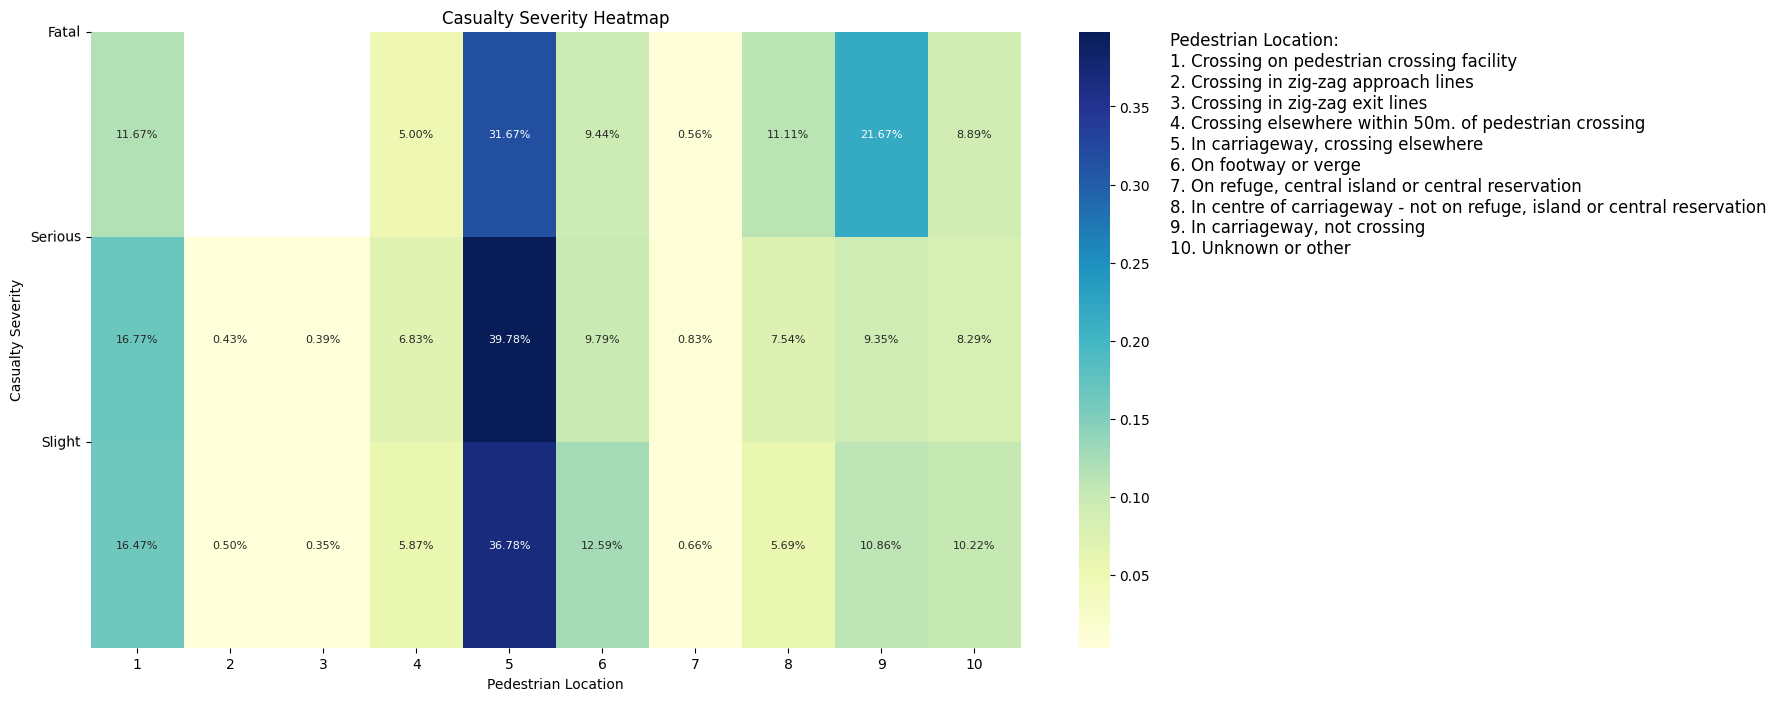

In [23]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_location"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_location", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Location")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Location:\n"
    + "1. Crossing on pedestrian crossing facility\n"
    + "2. Crossing in zig-zag approach lines\n"
    + "3. Crossing in zig-zag exit lines\n"
    + "4. Crossing elsewhere within 50m. of pedestrian crossing\n"
    + "5. In carriageway, crossing elsewhere\n"
    + "6. On footway or verge\n"
    + "7. On refuge, central island or central reservation\n"
    + "8. In centre of carriageway - not on refuge, island or central reservation\n"
    + "9. In carriageway, not crossing\n"
    + "10. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


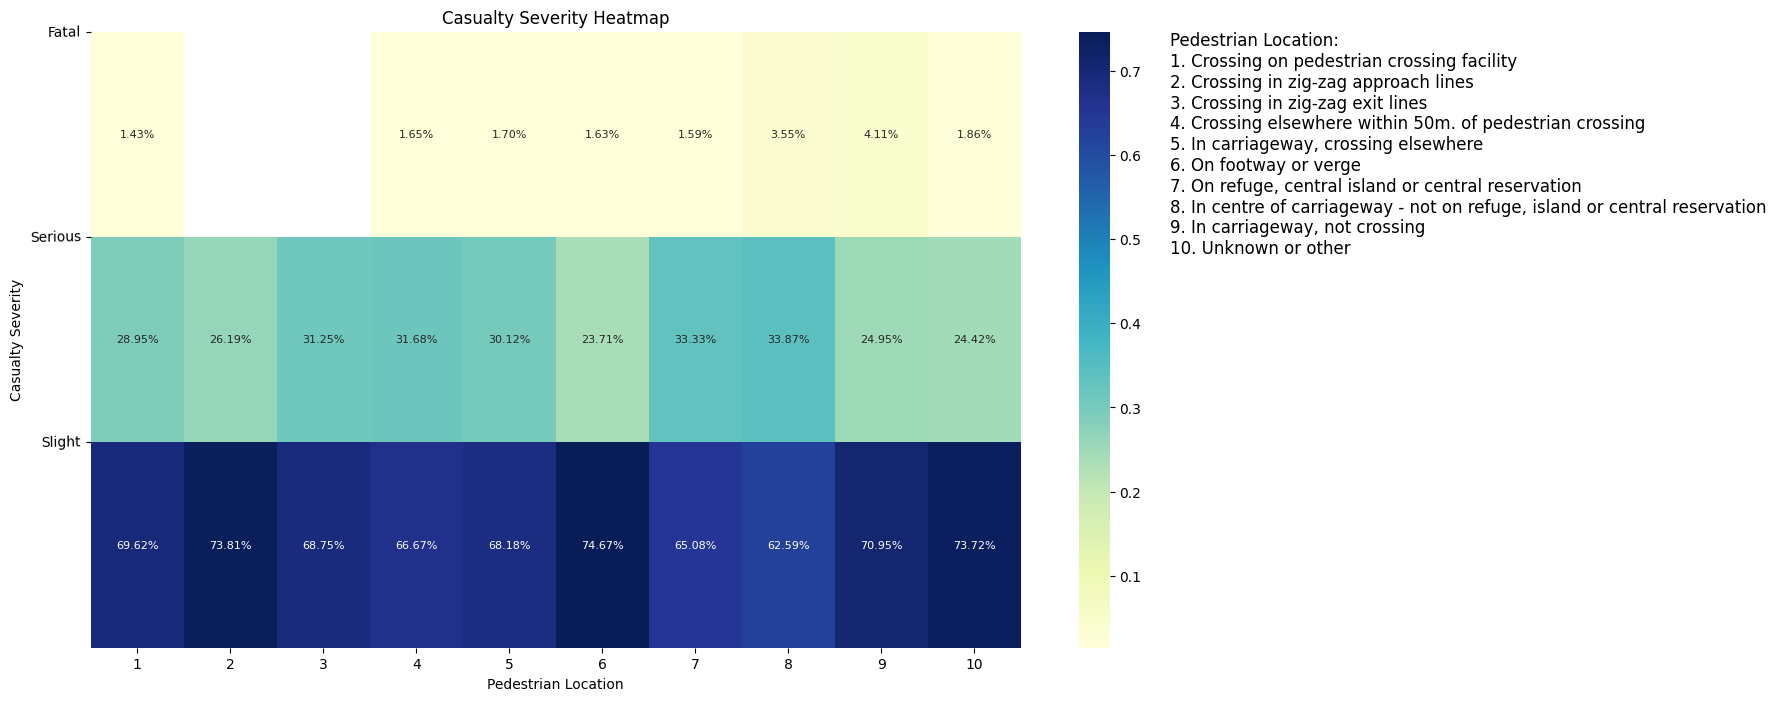

In [24]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_location"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_location", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Location")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Location:\n"
    + "1. Crossing on pedestrian crossing facility\n"
    + "2. Crossing in zig-zag approach lines\n"
    + "3. Crossing in zig-zag exit lines\n"
    + "4. Crossing elsewhere within 50m. of pedestrian crossing\n"
    + "5. In carriageway, crossing elsewhere\n"
    + "6. On footway or verge\n"
    + "7. On refuge, central island or central reservation\n"
    + "8. In centre of carriageway - not on refuge, island or central reservation\n"
    + "9. In carriageway, not crossing\n"
    + "10. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


### The number of casualties according to pedestrian movement and casualty severity.

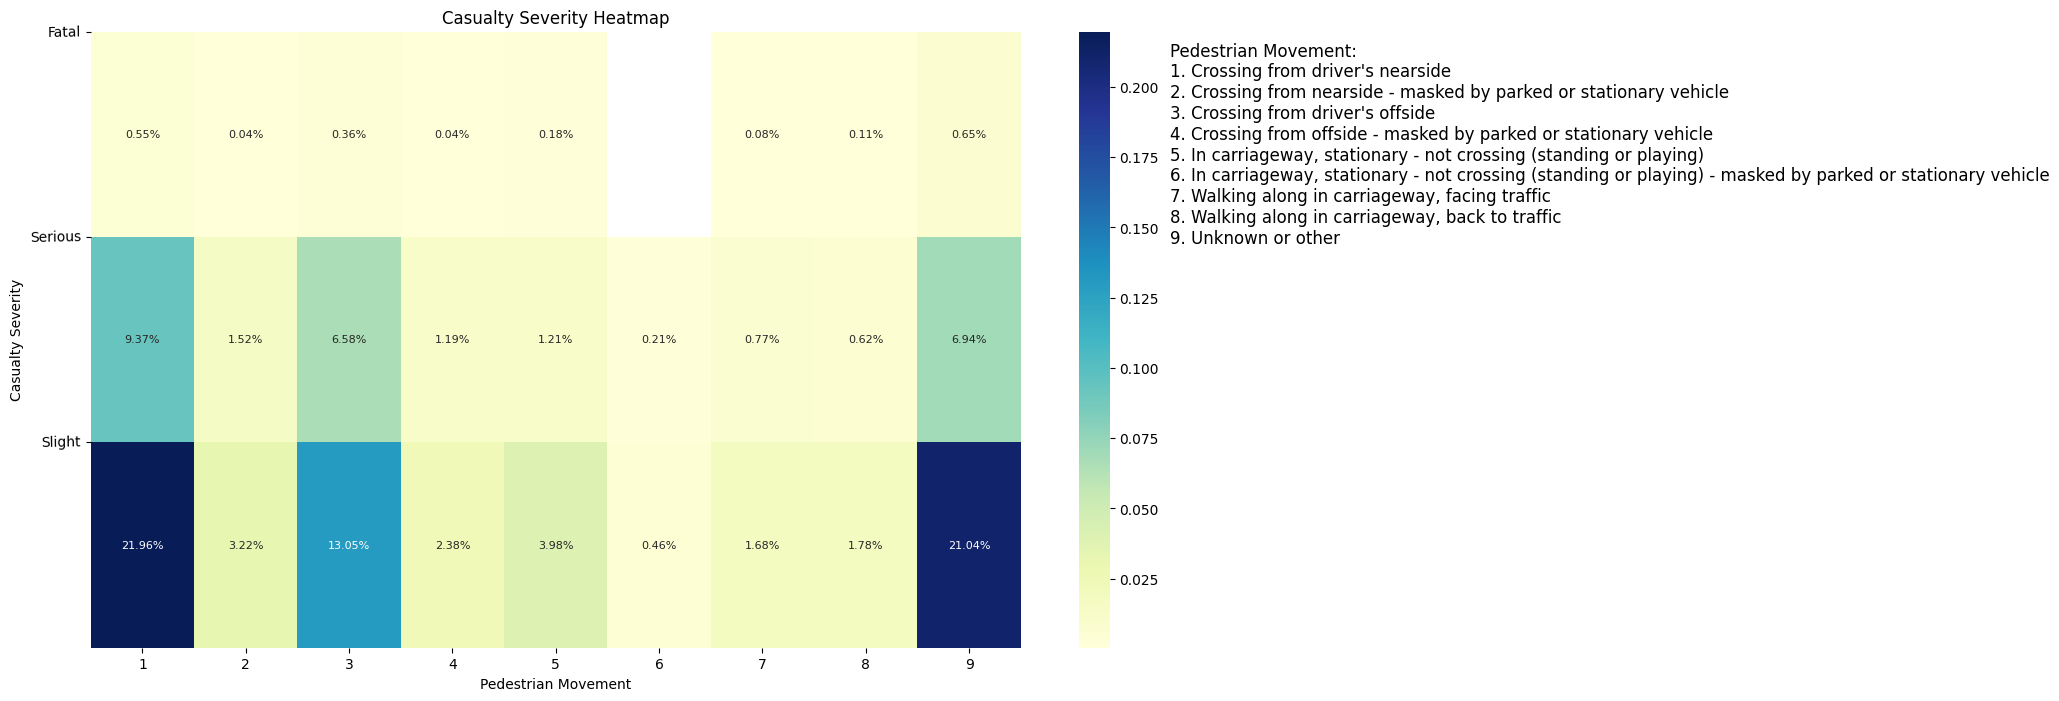

In [25]:
# Filter out rows where 'age_band_of_casualty' is not -1
df_temp = df[df["pedestrian_movement"] != -1]
df_temp = df_temp[df_temp["pedestrian_movement"] != 0]

# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_movement"])
    .size()
    .reset_index(name="count")
)
total_cnt = grouped["count"].sum()

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_movement", values="count"
)
heatmap_data = heatmap_data / total_cnt

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Movement")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Movement:\n"
    + "1. Crossing from driver's nearside\n"
    + "2. Crossing from nearside - masked by parked or stationary vehicle\n"
    + "3. Crossing from driver's offside\n"
    + "4. Crossing from offside - masked by parked or stationary vehicle\n"
    + "5. In carriageway, stationary - not crossing (standing or playing)\n"
    + "6. In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle\n"
    + "7. Walking along in carriageway, facing traffic\n"
    + "8. Walking along in carriageway, back to traffic\n"
    + "9. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


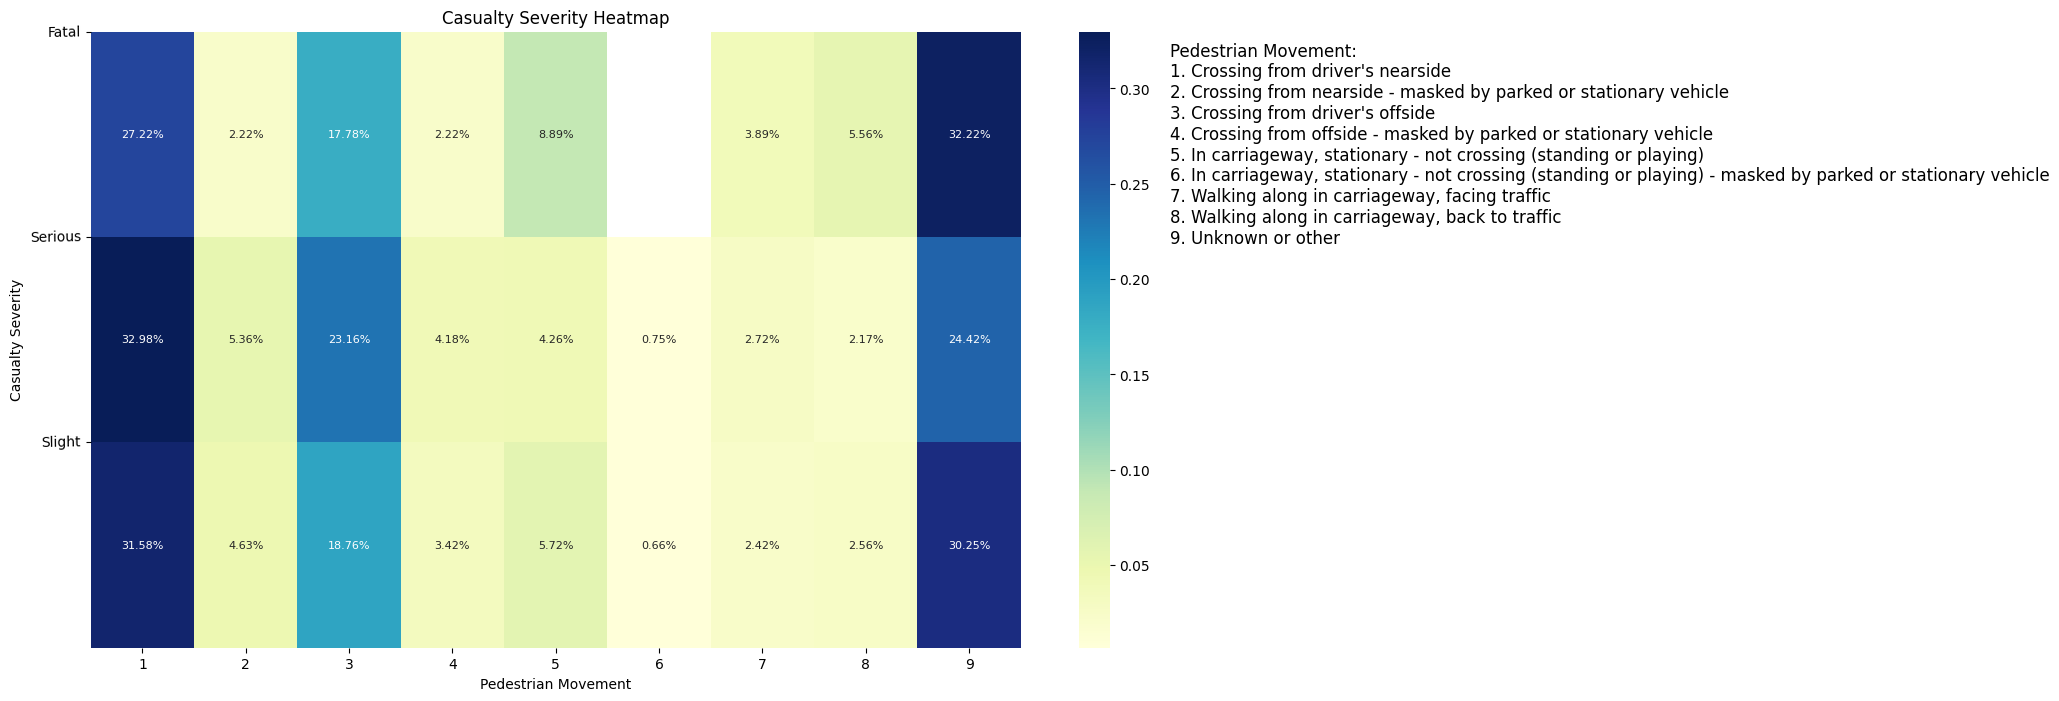

In [26]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_movement"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_movement", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Movement")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Movement:\n"
    + "1. Crossing from driver's nearside\n"
    + "2. Crossing from nearside - masked by parked or stationary vehicle\n"
    + "3. Crossing from driver's offside\n"
    + "4. Crossing from offside - masked by parked or stationary vehicle\n"
    + "5. In carriageway, stationary - not crossing (standing or playing)\n"
    + "6. In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle\n"
    + "7. Walking along in carriageway, facing traffic\n"
    + "8. Walking along in carriageway, back to traffic\n"
    + "9. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()


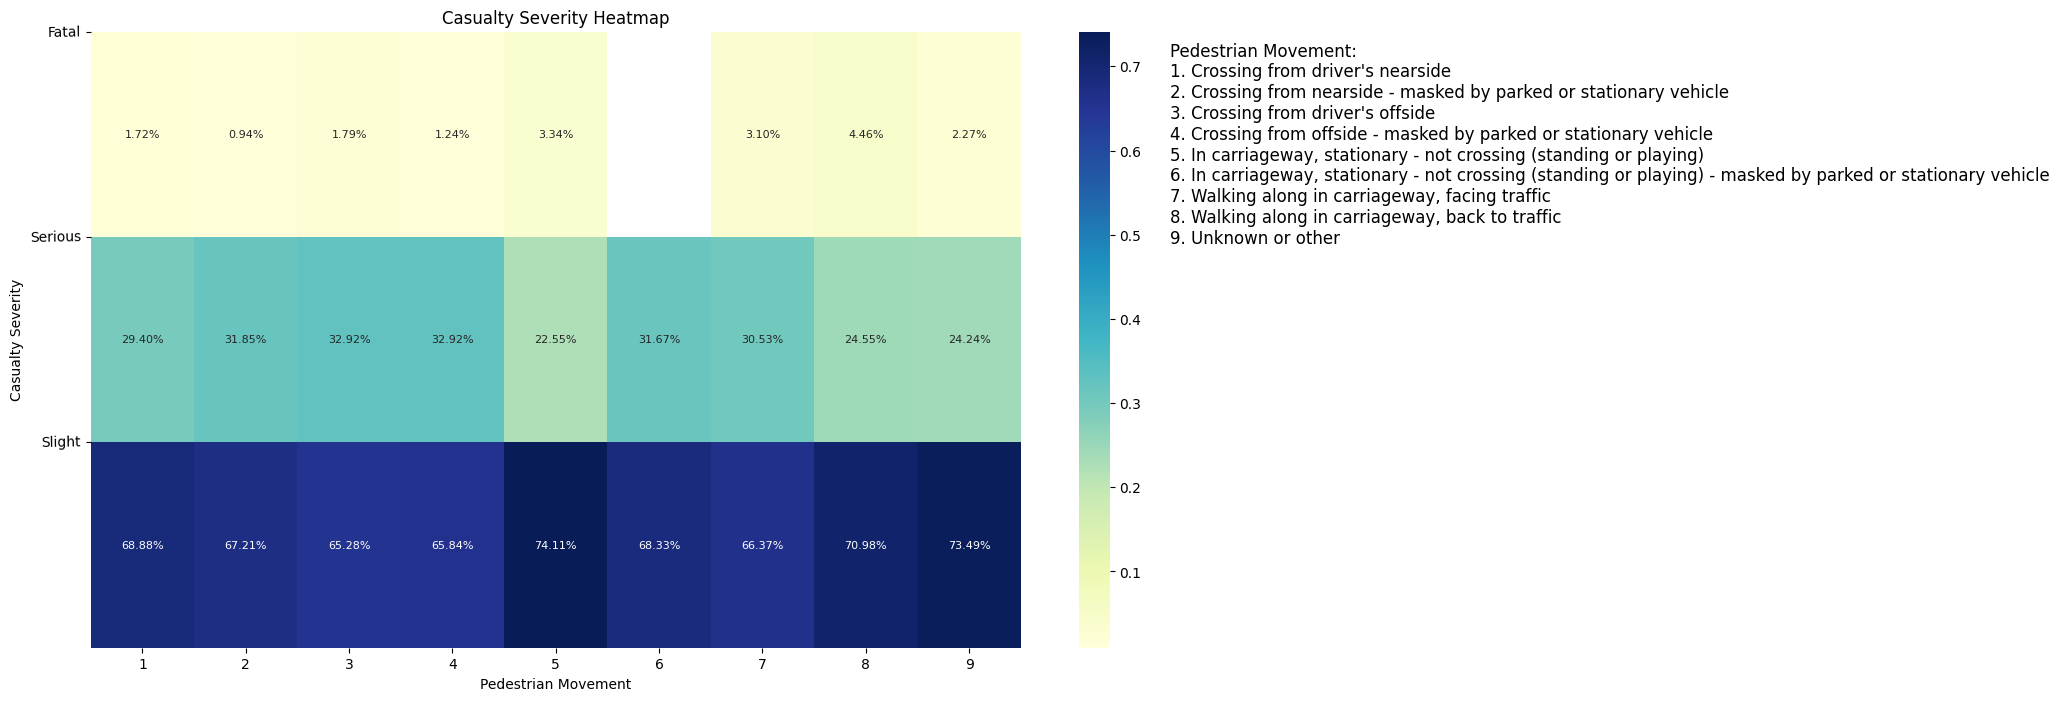

In [27]:
# Group by 'age_band_of_casualty' and 'casualty_severity', then count occurrences
grouped = (
    df_temp.groupby(["casualty_severity", "pedestrian_movement"])
    .size()
    .reset_index(name="count")
)

# Reshape the DataFrame for heatmap
heatmap_data = grouped.pivot(
    index="casualty_severity", columns="pedestrian_movement", values="count"
)

# norm_heatmap = heatmap_data
norm_heatmap = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(norm_heatmap, annot=True, cmap="YlGnBu", fmt=".2%", annot_kws={"size": 8})
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')

plt.title("Casualty Severity Heatmap")
plt.xlabel("Pedestrian Movement")
plt.ylabel("Casualty Severity")

# Set the y-axis ticks to ['Fatal', 'Serious', 'Slight']
plt.yticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"], rotation=1)

# Set the names of the bars
text = (
    "Pedestrian Movement:\n"
    + "1. Crossing from driver's nearside\n"
    + "2. Crossing from nearside - masked by parked or stationary vehicle\n"
    + "3. Crossing from driver's offside\n"
    + "4. Crossing from offside - masked by parked or stationary vehicle\n"
    + "5. In carriageway, stationary - not crossing (standing or playing)\n"
    + "6. In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle\n"
    + "7. Walking along in carriageway, facing traffic\n"
    + "8. Walking along in carriageway, back to traffic\n"
    + "9. Unknown or other\n"
)

plt.text(1.16, 0.8, text, fontsize=12, transform=plt.gca().transAxes, va="center")

plt.show()
